# Домашнее задание adult.csv

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [3]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.income)
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [5]:
y = le.transform(df.income)
y

array([0, 0, 1, ..., 0, 0, 1])

In [6]:
df.drop(['income'],axis=1,inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [7]:
df_dummies = pd.get_dummies(df)
df_dummies.shape

(48842, 108)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,y,test_size=0.2, random_state=0)

### Логистическая регрессия

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions_lr = lr.predict_proba(X_test)
roc_auc_score(y_test, predictions_lr[:, 1] )

C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5812988322151194

###  Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train,y_train)
predictions_rf = rf.predict_proba(X_test)
roc_auc_score(y_test, predictions_rf[:, 1] )

C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8923016504126893

In [39]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train,y_train)
predictions_rf = rf.predict_proba(X_test)
roc_auc_score(y_test, predictions_rf[:, 1] )

C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9057046411904361

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
predictions_dt = dt.predict_proba(X_test)
roc_auc_score(y_test, predictions_dt[:, 1] )

0.883593724002529

In [38]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)
predictions_dt2 = dt.predict_proba(X_test)
roc_auc_score(y_test, predictions_dt2[:, 1] )

0.8989699120690229

# ROC-кривые

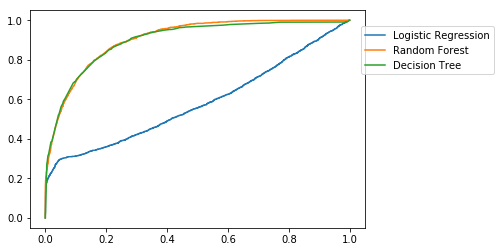

In [40]:
fpr, tpr, thres = roc_curve(y_test, predictions_lr[:, 1] )
plt.plot( fpr, tpr, label='Logistic Regression' )
fpr, tpr, thres = roc_curve(y_test, predictions_rf[:, 1] )
plt.plot( fpr, tpr, label='Random Forest'  )
fpr, tpr, thres = roc_curve(y_test, predictions_dt[:, 1] )
plt.plot( fpr, tpr, label='Decision Tree'  )
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.show()